<a href="https://colab.research.google.com/github/mfilipak/AFRAC_IA/blob/main/001_EDA_(Dados_do_Portal_da_cidad%C3%A2nia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimento 001
##Objetivo: EDA (Análise exploratória dos dados)
###Descrição: Nesse notebook, a partir de dados públicos do portal da transparência, foram feitas visualizações e apresentações estatísticas especialmente para entender o comportamento da descrição das mercadorias. A análise, insights obtidos estão sendo consolidados no fim desse notebook, incluindo eventualmente links externos para estudo e/ou consulta.


Dica: No COLAB Use CTRL SPACE ao invés de TAB para "autocompletar". Ex:pd.re [CTRL SPACE] vai mostrar uma lista contendo as funções e atributos que começam com pd.re (como read_csv, ...) 

In [6]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 - Carrega o dataset do link externo e copia o arquivo localmente

Fonte do dataset: https://www.portaltransparencia.gov.br/download-de-dados/notas-fiscais

Caso você queira rodar esse notebook com outros dados, você pode baixar outro intervalo usando o link acima. Após isso você pode alterar a célula abaixo ou simplesmente mover o arquivo para a pasta local do COLAB. Faça com que a varável DATA_FILE tenha o nome desse arquivo (formato zip ou CSV) e rode o restante do notebook com seus dados.

In [7]:
#Copia os dados das NFEs do portal da cidadância pro drive virtual.
import requests  
file_url = "https://raw.githubusercontent.com//mfilipak/AFRAC_IA/main/DATASET/202201_NFe_NotaFiscalItem.zip"
r = requests.get(file_url, stream = True) 

with open("portal.zip", "wb") as file:  
    for block in r.iter_content(chunk_size = 1024): 
         if block:  
             file.write(block)

DATA_FILE = "portal.zip"

#2 - Carrega o dataframe completo em df

In [8]:
df = pd.read_csv(DATA_FILE, encoding="CP1252",sep=";")
print("O dataframe completo contém:",len(df),"linhas")

O dataframe completo contém: 324056 linhas


In [9]:
df[:1]

,CHAVE DE ACESSO,MODELO,SÉRIE,NÚMERO,NATUREZA DA OPERAÇÃO,DATA EMISSÃO,CPF/CNPJ Emitente,RAZÃO SOCIAL EMITENTE,INSCRIÇÃO ESTADUAL EMITENTE,UF EMITENTE,...,PRESENÇA DO COMPRADOR,NÚMERO PRODUTO,DESCRIÇÃO DO PRODUTO/SERVIÇO,CÓDIGO NCM/SH,NCM/SH (TIPO DE PRODUTO),CFOP,QUANTIDADE,UNIDADE,VALOR UNITÁRIO,VALOR TOTAL
0,42220107432517001847550030005499571000224173,55 - NF-E EMITIDA EM SUBSTITUIÇÃO AO MODELO 1 ...,3,549957,Outra saida merc./prest.serv. nao especif.,01/01/2022 00:02:22,07432517001847,SIMPRESS COMERCIO LOCACAO E SERVICOS LTDA,257477446,SC,...,0 - NÃO SE APLICA,1,HP RESERVATORIO DE RESIDUO DE TONER,84439939,Outras partes e acessórios para aparelhos de f...,6949,"1,00",UNIDAD,"56,49","56,49"


In [10]:
df.keys()

Index(['CHAVE DE ACESSO', 'MODELO', 'SÉRIE', 'NÚMERO', 'NATUREZA DA OPERAÇÃO',
       'DATA EMISSÃO', 'CPF/CNPJ Emitente', 'RAZÃO SOCIAL EMITENTE',
       'INSCRIÇÃO ESTADUAL EMITENTE', 'UF EMITENTE', 'MUNICÍPIO EMITENTE',
       'CNPJ DESTINATÁRIO', 'NOME DESTINATÁRIO', 'UF DESTINATÁRIO',
       'INDICADOR IE DESTINATÁRIO', 'DESTINO DA OPERAÇÃO', 'CONSUMIDOR FINAL',
       'PRESENÇA DO COMPRADOR', 'NÚMERO PRODUTO',
       'DESCRIÇÃO DO PRODUTO/SERVIÇO', 'CÓDIGO NCM/SH',
       'NCM/SH (TIPO DE PRODUTO)', 'CFOP', 'QUANTIDADE', 'UNIDADE',
       'VALOR UNITÁRIO', 'VALOR TOTAL'],
      dtype='object')

# 3 - Limpeza inicial do dataframe.<br>
df2 conterá somente 4 campos (Data, descr, ncm e cfop)
Eliminados itens duplicados (mesma descr, ncm e cfop)

In [11]:
df2 = df[['DATA EMISSÃO','DESCRIÇÃO DO PRODUTO/SERVIÇO', 'CÓDIGO NCM/SH', 'CFOP']]
df2.columns = ["DATA", "DESCR", "NCM", "CFOP"]
df2 = df2.drop_duplicates(subset=["DESCR", "NCM", "CFOP"])
df2

,DATA,DESCR,NCM,CFOP
0,01/01/2022 00:02:22,HP RESERVATORIO DE RESIDUO DE TONER,84439939,6949
1,01/01/2022 00:03:59,MLTD201LXAZ CARTUCHO DE TONER PRETO 20K PAGINAS,84439933,6949
3,01/01/2022 00:12:39,CLTC609SXAZ CARTUCHO DE TONER CIANO 7K PAGINAS,84439933,6949
7,01/01/2022 00:46:32,MLTD203UXAZ CARTUCHO DE TONER PRETO 15K PAGINAS,84439933,6949
8,01/01/2022 00:55:40,CLTC506LXAZ CARTUCHO DE TONER CIANO 3.5K PAGINAS,84439933,6949
...,...,...,...,...
324044,31/01/2022 23:54:45,FAROL DE MILHA ESQUERDO / DIREITO,85149000,5405
324045,31/01/2022 23:54:45,FAROL LADO ESQUERDO/ DIREITO,85149000,5405
324046,31/01/2022 23:54:45,CUBO DE RODA DIANT DIREITO / ESQUERDO,87089529,5405
324048,31/01/2022 23:55:00,POLTRONA PRESIDENTE GIRATORIA,94021000,6102


#4 - Vamos dar uma olhada nas informações de cada coluna

In [12]:
print("CFOPS encontrados: ",len(df2["CFOP"].unique()))
print("NCMs encontrados: ",len(df2["NCM"].unique()))

CFOPS encontrados:  211
NCMs encontrados:  4672


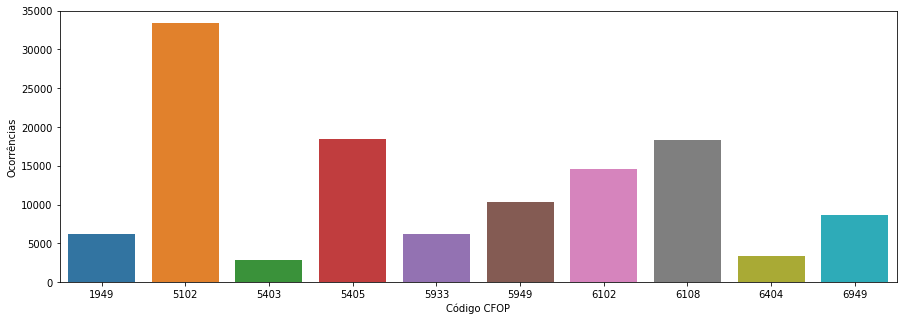

10 CFOPs mais frequentes
 5403     2929
6404     3341
5933     6206
1949     6262
6949     8648
5949    10358
6102    14621
6108    18393
5405    18507
5102    33348
Name: CFOP, dtype: int64


In [13]:
aux = df2["CFOP"].value_counts().sort_values()[-10:]
plt.figure(figsize=((15,5)))
ax = sns.barplot(x=aux.index, y=aux, )
ax.set(xlabel='Código CFOP', ylabel='Ocorrências')
plt.show()
print("10 CFOPs mais frequentes\n",aux)

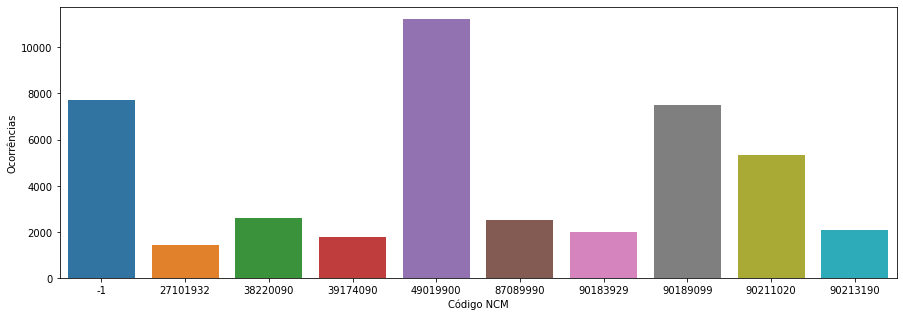

10 NCMs mais frequentes
  27101932     1434
 39174090     1803
 90183929     1994
 90213190     2110
 87089990     2515
 38220090     2593
 90211020     5354
 90189099     7506
-1            7722
 49019900    11197
Name: NCM, dtype: int64


In [14]:
aux = df2["NCM"].value_counts().sort_values()[-10:]
plt.figure(figsize=((15,5)))
ax = sns.barplot(x=aux.index, y=aux, )
ax.set(xlabel='Código NCM', ylabel='Ocorrências')
plt.show()
print("10 NCMs mais frequentes\n",aux)

In [15]:
#Por aqui, podemos ver que NCM=-1 normalmente está associado a serviços. Vamos excluí-los a seguir.
df2[df2["NCM"]==-1]

,DATA,DESCR,NCM,CFOP
33,01/01/2022 02:25:00,SERVICOS RELACIONADOS AO MONITORAMENTO E RASTR...,-1,5933
35,01/01/2022 03:28:00,MANUTENCAO DE HW,-1,5933
36,01/01/2022 03:56:02,SERVICO DE DATACENTER - CONTRATO N° 39/2018 -...,-1,5933
69,01/01/2022 11:01:00,"INSTALACAO, CONFIGURACAO E MANUTENCAO DE PROGR...",-1,5933
76,01/01/2022 12:15:00,N Servico: 202100455410,-1,5933
...,...,...,...,...
323393,31/01/2022 20:10:00,NF ref.aos Serviços Prestados do Contrato:51/2...,-1,5933
323394,31/01/2022 20:10:00,NF ref. aos Serv. Prest. do Contrato:51/2018-O...,-1,5933
323395,31/01/2022 20:10:00,NF ref. aos Serv. Prest. do Contrato:51/2018-O...,-1,5933
323696,31/01/2022 21:34:13,FITA ZEBRADA PRETO/AMARELO 200 M,-1,5102


In [16]:
#Filtrando NCMs = -1
df2 = df2[df2["NCM"]!=-1]
len(df2)

155060

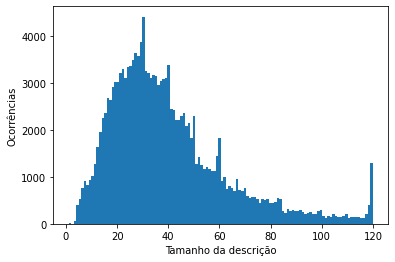

In [17]:
text_lengths = np.array([len(_) for _ in df2['DESCR']])
plt.hist(text_lengths, bins=120)
plt.ylabel("Ocorrências")
plt.xlabel("Tamanho da descrição")
plt.show()

# 5 - Vamos olhar mais atentamente a coluna de descrição

In [18]:
#TIrando PÁ e CD o restante não parecem ser descrições válidas. Vamos excluí-las
np.unique(list(df2[text_lengths<3]["DESCR"]))

array(['*', '-', '.', '5', 'CD', 'LH', 'PÁ', 'UN'], dtype='<U2')

In [19]:
#Filtrando essas descrições curtas
df2 = df2[text_lengths>=3]
len(df2)

155038

# 6 - Vejamos agora quantas descrições iguais possuem campos de NCM e/ou CFOP diferentes.

In [20]:
#Pode se observar que existem descrições idênciticas com NCM e/ou CFOP diferentes. O caso mais emblemático é Filtro de Óleo
df2["DESCR"].value_counts()

FILTRO DE OLEO                            64
FILTRO DE COMBUSTIVEL                     61
FILTRO DE AR                              58
FILTRO COMBUSTIVEL                        52
BANANA PRATA                              46
                                          ..
LACTULOSE XPE 667MG/ML AMEIXA FR 120ML     1
DISSIPADOR DE CALOR PARA FONTE ATX         1
HD 8 TB                                    1
SSD DE 240GB                               1
Leite Cru Refrigerado                      1
Name: DESCR, Length: 129351, dtype: int64

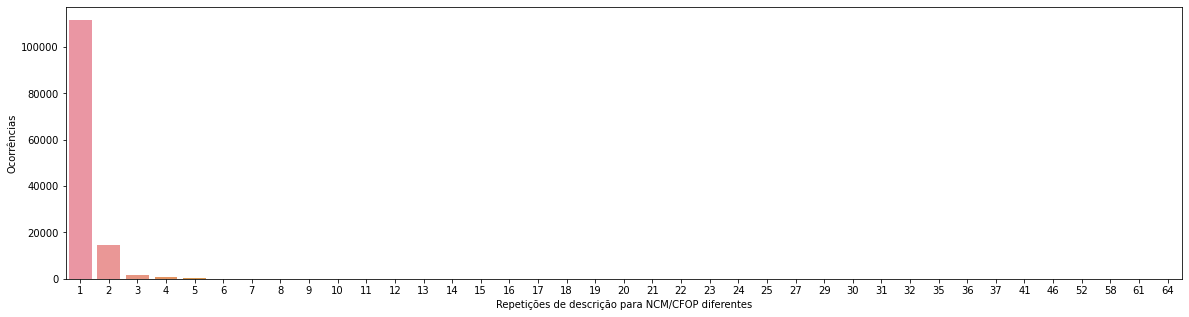

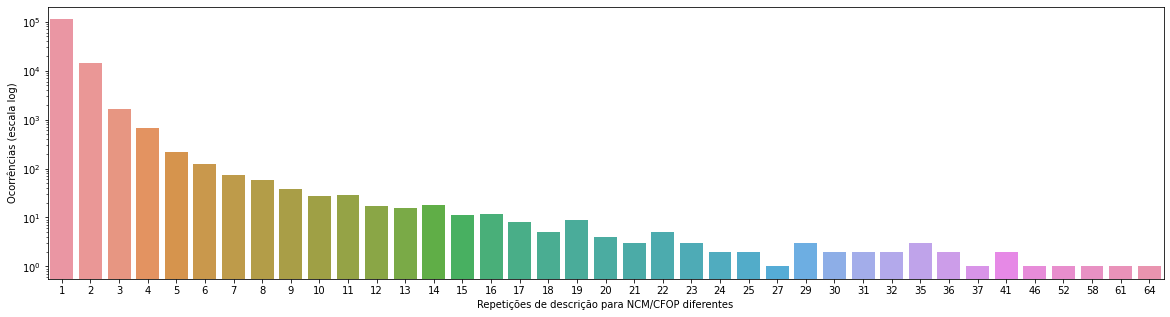

In [21]:
plt.figure(figsize=(20,5))
aux = df2["DESCR"].value_counts().value_counts()
ax = sns.barplot(x=aux.sort_index().index, y=aux.sort_index())
ax.set_yscale("linear")
ax.set(xlabel='Repetições de descrição para NCM/CFOP diferentes', ylabel='Ocorrências')
plt.show()

plt.figure(figsize=(20,5))
aux = df2["DESCR"].value_counts().value_counts()
ax = sns.barplot(x=aux.sort_index().index, y=aux.sort_index())
ax.set_yscale("log")
ax.set(xlabel='Repetições de descrição para NCM/CFOP diferentes', ylabel='Ocorrências (escala log)')
plt.show()

# 7 - Pra um desses itens com muitas repetições, vamos explorar o que acontece com a distribuição de NCM/CFOP

In [22]:
df2["DESCR"].value_counts()[:11]

FILTRO DE OLEO           64
FILTRO DE COMBUSTIVEL    61
FILTRO DE AR             58
FILTRO COMBUSTIVEL       52
BANANA PRATA             46
BATATA DOCE              41
OLEO MOTOR               41
BETERRABA                37
ADITIVO RADIADOR         36
CENOURA                  36
MELANCIA                 35
Name: DESCR, dtype: int64

In [23]:
#Vejamos o quinto item da lista (começa em 0)
selection = df2["DESCR"].value_counts().index[4]
selection

'BANANA PRATA'

In [24]:
#Algumas ocorrências - Tanto o NCM como o CFOP variaram
df2[df2["DESCR"] == selection][:5]


,DATA,DESCR,NCM,CFOP
540,02/01/2022 17:23:00,BANANA PRATA,8039000,6102
595,02/01/2022 23:39:00,BANANA PRATA,8031000,5102
1725,03/01/2022 07:52:41,BANANA PRATA,8039000,5102
2412,03/01/2022 08:12:00,BANANA PRATA,8043000,5102
3556,03/01/2022 09:36:42,BANANA PRATA,6022000,5102


In [25]:
reps = df2[df2["DESCR"] == selection]["NCM"]
list(reps.value_counts())

[10, 8, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

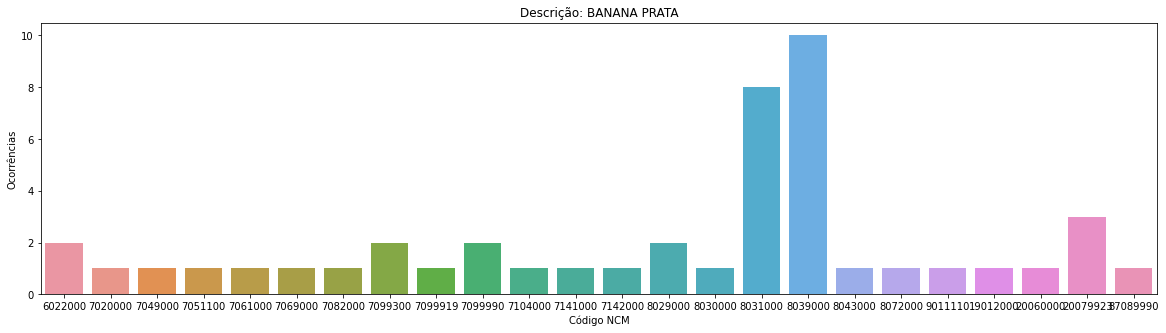

In [26]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x=reps.value_counts().index, y=list(reps.value_counts()), )
ax.set(xlabel='Código NCM', ylabel='Ocorrências', title=f"Descrição: {selection}")
plt.show()

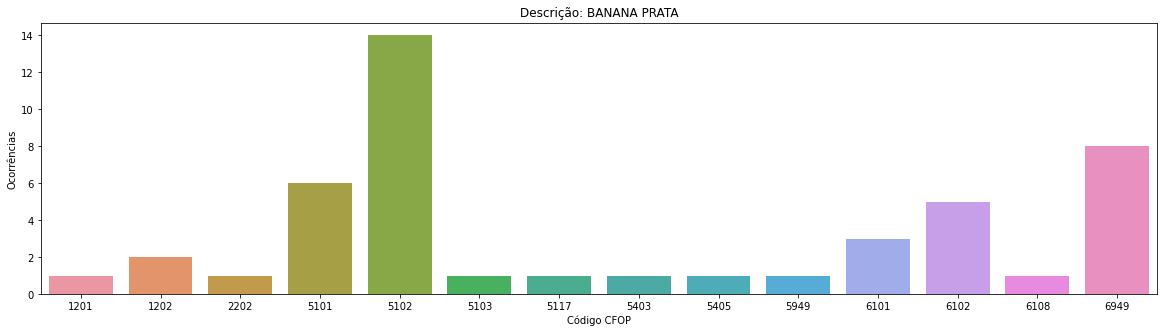

In [30]:
reps = df2[df2["DESCR"] == selection]["CFOP"]
plt.figure(figsize=(20,5))
ax = sns.barplot(x=reps.value_counts().index, y=list(reps.value_counts()), )
ax.set(xlabel='Código CFOP', ylabel='Ocorrências', title=f"Descrição: {selection}")
plt.show()

#8 - Vamos dar uma olhada na distribuição de palavras nas descrições

In [36]:
#Dessa vez não vamos filtrar as repetições das descrições pois a frequência pode ser relevante para uma visualização inicial e/ou também dependendo do modelo que será utilizado
df3 = df[['DATA EMISSÃO','DESCRIÇÃO DO PRODUTO/SERVIÇO', 'CÓDIGO NCM/SH', 'CFOP']]
df3.columns = ["DATA", "DESCR", "NCM", "CFOP"]

#Essa é a filtragem que não será feita aqui
#df3 = df3.drop_duplicates(subset=["DESCR", "NCM", "CFOP"])

df3 = df3[df3["NCM"]!=-1] #Filtrando NCMs = -1

text_lengths = np.array([len(_) for _ in df3['DESCR']])
df3 = df3[text_lengths>=3]

In [37]:
all_words = []
for d in list(df3["DESCR"]):
    all_words += d.split()
words_counts = pd.DataFrame(all_words).value_counts()

In [42]:
print(f"Em {len(df3)} descrições foram encontradas {len(all_words)} palavras.")
print(f"Média de : {len(all_words)/len(df3):.02f} palavras por descrição")
print(f"Total de palavras únicas encontradas {len(words_counts)}")

Em 304255 descrições foram encontradas 1769852 palavras.
Média de : 5.82 palavras por descrição
Total de palavras únicas encontradas 133449


In [45]:
print("Palavras mais frequentemente encontradas")
print(words_counts[:20])

Palavras mais frequentemente encontradas
-           69695
DE          54644
E            9927
X            9232
PARA         8894
COM          8217
de           7739
4            7691
EM           7508
MM           7402
1            7184
FILTRO       6897
PARAFUSO     6715
A            6629
TIPO         6181
PNLD         6023
OLEO         5683
LIVRO        5272
DO           4974
KG           4881
dtype: int64


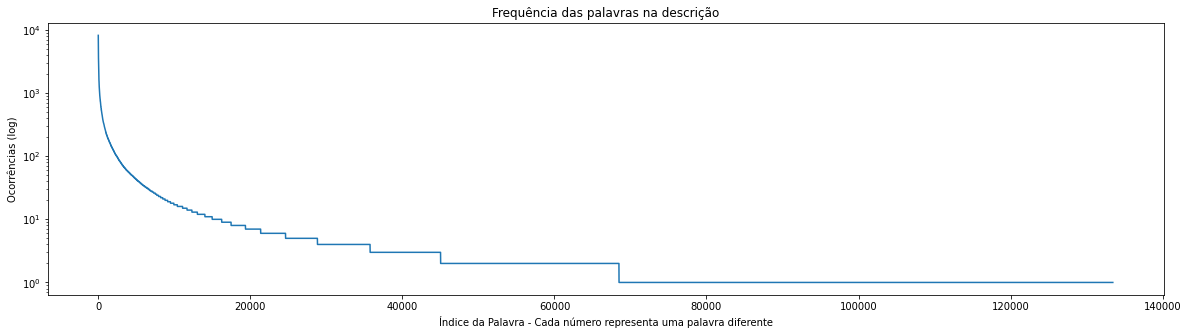

In [50]:
plt.figure(figsize=((20,5)))
plt.title("Frequência das palavras na descrição")
plt.ylabel("Ocorrências (log)")
plt.xlabel("Índice da Palavra - Cada número representa uma palavra diferente")
plt.yscale("log")
plt.plot(list(pd.DataFrame(all_words).value_counts())[:])
plt.show()

# 9 - Mesma análise eliminando todas as repetições de descrição

In [53]:
df4 = df3.drop_duplicates(subset=["DESCR"])
len(df4)


129351

In [54]:
all_words = []
for d in list(df4["DESCR"]):
    all_words += d.split()
words_counts = pd.DataFrame(all_words).value_counts()

In [55]:
print(f"Em {len(df4)} descrições foram encontradas {len(all_words)} palavras.")
print(f"Média de : {len(all_words)/len(df4):.02f} palavras por descrição")
print(f"Total de palavras únicas encontradas {len(words_counts)}")

Em 129351 descrições foram encontradas 866497 palavras.
Média de : 6.70 palavras por descrição
Total de palavras únicas encontradas 133449


In [56]:
print("Palavras mais frequentemente encontradas")
print(words_counts[:20])

Palavras mais frequentemente encontradas
-           37012
DE          27888
E            5369
PARA         5229
X            5127
COM          4299
1            3959
EM           3950
TIPO         3718
de           3549
A            3288
|            3117
DO           3024
FILTRO       2860
C/           2637
DA           2432
MM           2337
2            2319
/            2160
PARAFUSO     2126
dtype: int64


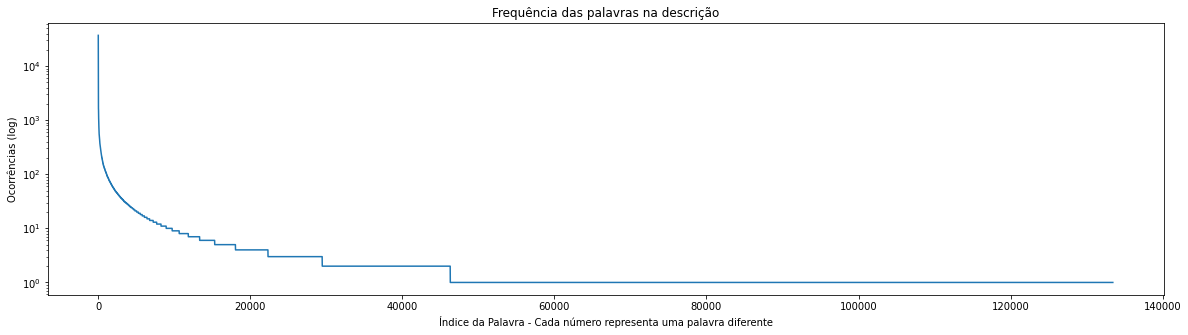

In [71]:
plt.figure(figsize=((20,5)))
plt.title("Frequência das palavras na descrição")
plt.ylabel("Ocorrências (log)")
plt.xlabel("Índice da Palavra - Cada número representa uma palavra diferente")
plt.yscale("log")
plt.plot(list(words_counts)[:])
plt.show()

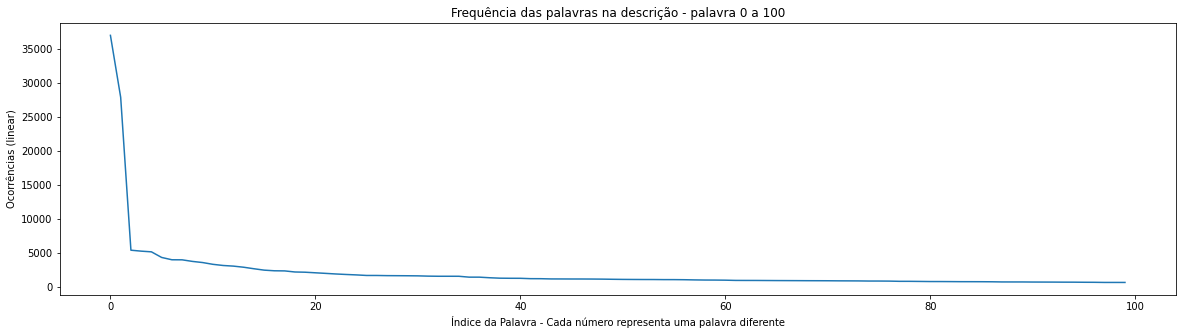

In [66]:
plt.figure(figsize=((20,5)))
plt.title("Frequência das palavras na descrição - palavra 0 a 100")
plt.ylabel("Ocorrências (linear)")
plt.xlabel("Índice da Palavra - Cada número representa uma palavra diferente")
plt.yscale("linear")
plt.plot(list(words_counts)[:100])
plt.show()

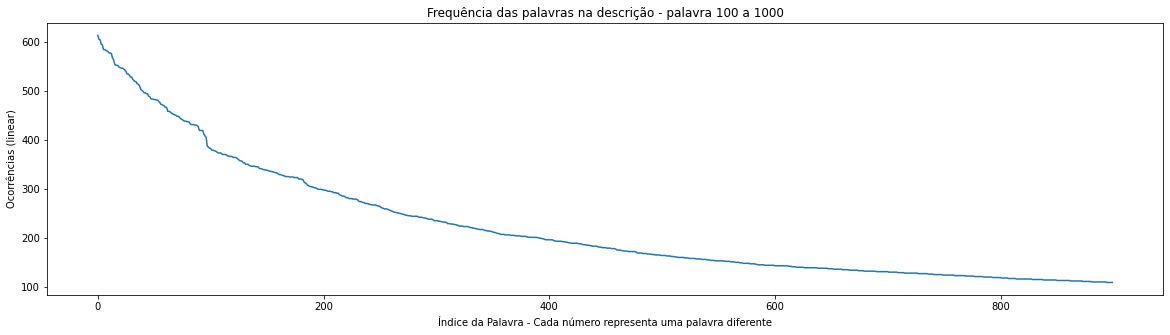

In [72]:
plt.figure(figsize=((20,5)))
plt.title("Frequência das palavras na descrição - palavra 100 a 1000")
plt.ylabel("Ocorrências (linear)")
plt.xlabel("Índice da Palavra - Cada número representa uma palavra diferente")
plt.yscale("linear")
plt.plot(list(words_counts)[100:1000])
plt.show()

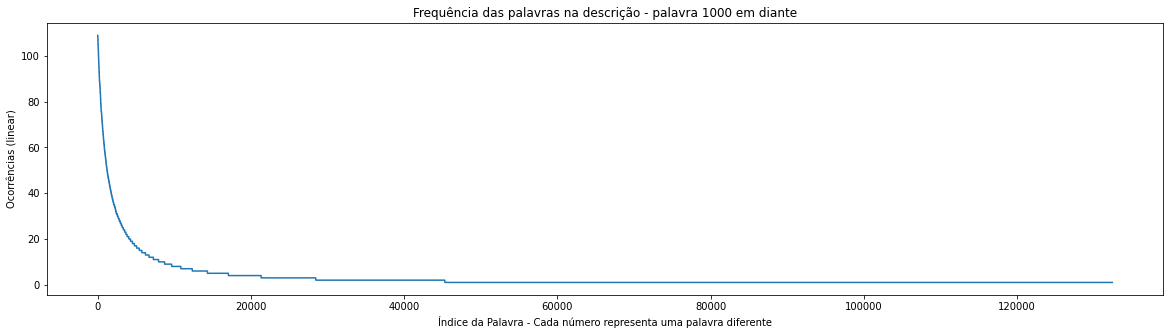

In [73]:
plt.figure(figsize=((20,5)))
plt.title("Frequência das palavras na descrição - palavra 1000 em diante")
plt.ylabel("Ocorrências (linear)")
plt.xlabel("Índice da Palavra - Cada número representa uma palavra diferente")
plt.yscale("linear")
plt.plot(list(words_counts)[1000:])
plt.show()

In [89]:
aux = np.array(list(words_counts))
aux = aux/aux.sum()
cumulative_words_count = np.cumsum(aux)
aux, cumulative_words_count

(array([4.27145160e-02, 3.21847623e-02, 6.19621303e-03, ...,
        1.15407209e-06, 1.15407209e-06, 1.15407209e-06]),
 array([0.04271452, 0.07489928, 0.08109549, ..., 0.99999769, 0.99999885,
        1.        ]))

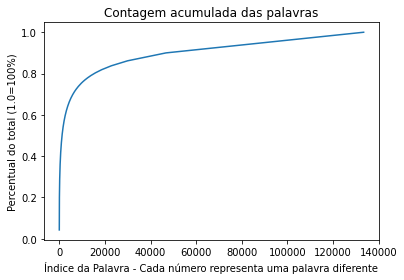

      6 primeiras palavras representam 10% das ocorrências
     53 primeiras palavras representam 20% das ocorrências
    199 primeiras palavras representam 30% das ocorrências
    525 primeiras palavras representam 40% das ocorrências
   1210 primeiras palavras representam 50% das ocorrências
   2646 primeiras palavras representam 60% das ocorrências
   5981 primeiras palavras representam 70% das ocorrências
  15258 primeiras palavras representam 80% das ocorrências
  46799 primeiras palavras representam 90% das ocorrências
 133448 primeiras palavras representam 100% das ocorrências


In [111]:
plt.title("Contagem acumulada das palavras")
plt.ylabel("Percentual do total (1.0=100%)")
plt.xlabel("Índice da Palavra - Cada número representa uma palavra diferente")
plt.plot(cumulative_words_count)
plt.show()
print("\n".join([ f"{(cumulative_words_count<_/10).sum():7} primeiras palavras representam {_*10}% das ocorrências" for _ in range(1,11)]))

#RESULTADOS:<br>
1 - Existe uma parcela significativa das descrições com mais de um NCM e/ou CFOP para a mesma descrição. Isso por si só sugere a existência de algumas classificações erradas. Nesse notebook, parte do código para identificação desses casos pode ser útil numa ferramenta de anotação para por exemplo indicar classificações corretas e erradas.<br>
2 - Alguns filtros usados aqui parecem ser razoáveis dependendo do contexto e do modelo como: Eliminar descrições muito curtas, descrição + NCM + CFOP iguais, NCM=-1 e até mesmo a supressão de palavras muito frequentes como "DE" e "-" por exemplo.<br>
A ser continuado



# INSIGHTS / TRABALHOS FUTUROS<br>
1 - Um modelo doc2vec parece ser um bom ponto de partida inicial para as descrições. O gensim já testado pelo Anderson parece um bom candidato inicial.<br>
2 - Pode ser interessante fazer algum tipo de transfer learning a partir de um modelo treinado para a língua portuguesa. No primeiro experimento vamos criar o modelo gerador de embedding (doc2vec) do zero para ter como baseline.<br>
3 - Estudar como clusterizar os embeddings para que GTIN e NCM agrupem os embeddings. Algo análogo ao debiasing, só que ao contrário, pode ser interessante. Redes siamesas também.<br>
4 - Como a descrição está limitada a 120 caracteres, uma representação baseada em modelo sequêncial e caracter a caracter pode ser viável, embora os tempos de treinamento e complexidade dos modelos devam ficar maiores segundo o Andrew Ng. Pode ficar ainda mais parecido com redes siamesas pois uma convolução 1D pode dar conta e nesse caso tem potencial para ser rápida.<br>
5 - Modelos mais complexos como BERT ou os GPTn podem eventualmente ser interessantes para tornar os modelos mais generalistas pois podem criar descrições semelhantes com mais facilidade, ex: Caldo de Galinha virar Caldo de Carne (claro que só faria sentido se caldo de acarne já não estivesse no conjunto original).